In [1]:
### Using csv

### Import dependencies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np #For scientific computing with Python
import random  #Set seed for random number generator
import struct  #For handling binary data stored in files (It is used to perform conversions between Python values and C structs represented as Python strings.)
import os
import random as rnd

### Import keras

In [2]:
import keras
from keras.models import load_model
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
# from keras.callbacks import TensorBoard   #Visualize the performance of tensorflow training session
from keras import backend

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
batch_size = 256  #How many images will be input at once (Better performance(not sure about accuracy) but larger memory)
num_classes = 62
epochs = 10

## File paths

In [4]:
Emnist_file_path = "C:/Users/praga/OneDrive/Documents/Rutgers/Rutgers_Misc/Additional or Extra Files/Rutgers Project 3/Source Code/emnist/"

In [5]:
All_train = Emnist_file_path + 'emnist-byclass-train.csv'
All_test = Emnist_file_path + 'emnist-byclass-test.csv'

## Load Data

In [6]:
All_train_data = pd.read_csv(All_train)
All_test_data = pd.read_csv(All_test)

In [7]:
print(All_train_data.shape)
print(All_test_data.shape)

(697931, 785)
(116322, 785)


In [8]:
print(type(All_train_data))
print(type(All_test_data))
# print(digits_train_data)
print(All_train_data.shape)
# print(digits_test_data)
print(All_test_data.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(697931, 785)
(116322, 785)


## Prepare or preprocess Data

In [9]:
All_training_data = All_train_data.values
All_testing_data = All_test_data.values


In [10]:
print(All_training_data.shape)
print(All_testing_data.shape)

(697931, 785)
(116322, 785)


In [11]:
print('Preparing letters labels for concatenation')
All_training_data[:, 0:1] =  All_training_data[:, 0:1] + 9
All_testing_data[:, 0:1] =  All_testing_data[:, 0:1] + 9

Preparing letters labels for concatenation


In [12]:
# print('Conconcatening datas')
# Complete_training_data = np.concatenate((digits_training_data, letters_training_data), axis=0)
# rnd.shuffle(Complete_training_data)

x_train = All_training_data[:, 1:].astype('float32')
y_train = All_training_data[:, 0:1]
print('x_train shape : ', x_train.shape)

# Complete_testing_data = np.concatenate((digits_testing_data, letters_testing_data), axis=0)

x_test = All_testing_data[:, 1:].astype('float32')
y_test = All_testing_data[:, 0:1]
print('x_test shape : ', x_test.shape)

print('transposing data')

# for dense
x_train = np.array(list(map(lambda x : x.reshape(28, 28).transpose().flatten(), x_train)))
x_test = np.array(list(map(lambda x : x.reshape(28, 28).transpose().flatten(), x_test)))

x_train shape :  (697931, 784)
x_test shape :  (116322, 784)
transposing data


data  755  :  [45]


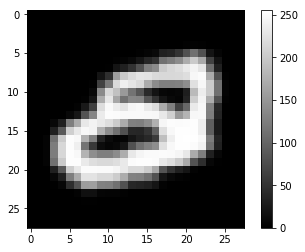

In [13]:
# Print the i data 
i = 755
plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
plt.colorbar()
print('data ', i, ' : ', y_test[i])

In [14]:
# Scale from 0 to 255
x_train /= 255
x_test /= 255

In [15]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (697931, 784)
x_test shape: (116322, 784)
697931 train samples
116322 test samples


In [16]:
# We need to convert our target labels (expected values) to categorical data
num_classes=120
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Define Model

In [17]:
# for dense
model = Sequential()
# Add the first layer where the input dimensions are the 784 pixel values
# We can also choose our activation function. `relu` is a common
model.add(Dense(512, activation='relu', input_shape=(784,))) 
model.add(Dropout(0.5))  # Dropout is a regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data. It is a very efficient way of performing model averaging with neural networks. The term "dropout" refers to dropping out units in a neural network.
# Add a second hidden layer
model.add(Dense(128, activation='relu'),)
model.add(Dropout(0.5))
# Add a third hidden layer
model.add(Dense(64, activation='relu'),)
# Add our final output layer where the number of nodes 
# corresponds to the number of y labels
model.add(Dense(num_classes, activation='softmax')) 

## Compile Model

In [18]:
# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

## Summarize model

In [19]:
# We can summarize our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 120)               7800      
Total params: 483,640
Trainable params: 483,640
Non-trainable params: 0
_________________________________________________________________


## Train Model

* Training consists of updating our weights using our optimizer and loss function. In this example, we choose 10 iterations (loops) of training that are called epochs.
* We also choose to shuffle our training data and increase the detail printed out during each training cycle.



In [20]:
# Fit (train) the model
history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    shuffle=True,
    verbose=3,
    validation_split=0.1
)

Train on 628137 samples, validate on 69794 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


## Evaluating the Model

We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

In [21]:
score = model.evaluate(x_test, y_test, verbose=1)

116322/116322 [==============================] - 7s 60us/step


In [22]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.539305380189319
Test accuracy: 0.8193462973470195


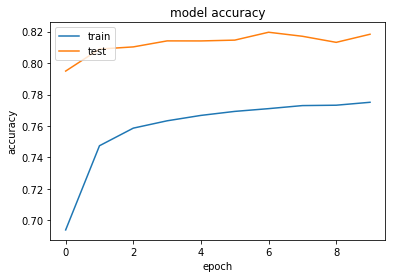

In [23]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



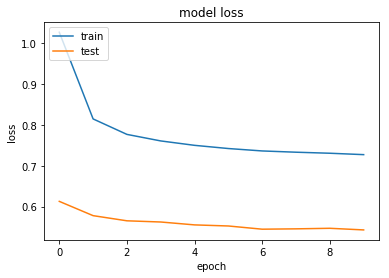

In [24]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model.save('Emnist04.h5')

## Making Predictions
We can use our trained model to make predictions using model.predict